<a href="https://colab.research.google.com/github/udghosh/Practice/blob/main/T%26T_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LINEAR REGRESSION**

Estimated coefficients:
b_0 = 1.2363636363636363 \ 
b_1 = 1.1696969696969697


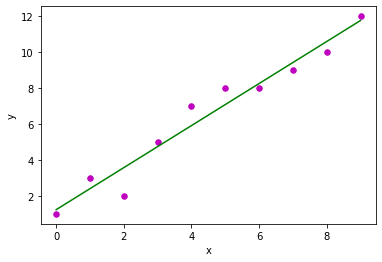

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

def estimate_coef(x, y): 
	# number of observations/points 
	n = np.size(x) 

	# mean of x and y vector 
	m_x, m_y = np.mean(x), np.mean(y) 

	# calculating cross-deviation and deviation about x 
	SS_xy = np.sum(y*x) - n*m_y*m_x 
	SS_xx = np.sum(x*x) - n*m_x*m_x 

	# calculating regression coefficients 
	b_1 = SS_xy / SS_xx 
	b_0 = m_y - b_1*m_x 

	return(b_0, b_1) 

def plot_regression_line(x, y, b): 
	# plotting the actual points as scatter plot 
	plt.scatter(x, y, color = "m", 
			marker = "o", s = 30) 

	# predicted response vector 
	y_pred = b[0] + b[1]*x 

	# plotting the regression line 
	plt.plot(x, y_pred, color = "g") 

	# putting labels 
	plt.xlabel('x') 
	plt.ylabel('y') 

	# function to show plot 
	plt.show() 

def main(): 
	# observations 
	x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
	y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 

	# estimating coefficients 
	b = estimate_coef(x, y) 
	print("Estimated coefficients:\nb_0 = {} \ \nb_1 = {}".format(b[0], b[1])) 

	# plotting regression line 
	plot_regression_line(x, y, b) 

if __name__ == "__main__": 
	main() 


**NON LINEAR REGRESSION**

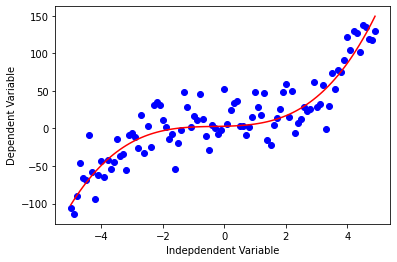

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

x = np.arange(-5.0, 5.0, 0.1) 

## You can adjust the slope and intercept to verify the changes in the graph 
y = 1*(x**3) + 1*(x**2) + 1 * x + 3
y_noise = 20 * np.random.normal(size = x.size) 
ydata = y + y_noise 
plt.plot(x, ydata, 'bo') 
plt.plot(x, y, 'r') 
plt.ylabel('Dependent Variable') 
plt.xlabel('Indepdendent Variable') 
plt.show() 


**LOGISTIC REGRESSION**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap 

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/User_Data.csv') 


In [ ]:
# input 
x = dataset.iloc[:, [2, 3]].values 

# output 
y = dataset.iloc[:, 4].values 


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0) 

In [ ]:

sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest) 

print (xtrain[0:10, :]) 


[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


In [ ]:
classifier = LogisticRegression(random_state = 0) 
classifier.fit(xtrain, ytrain) 


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(xtest) 

cm = confusion_matrix(ytest, y_pred) 

print ("Confusion Matrix : \n", cm) 


Confusion Matrix : 
 [[65  3]
 [ 8 24]]


In [ ]:
 
print ("Accuracy : ", accuracy_score(ytest, y_pred)) 


Accuracy :  0.89


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


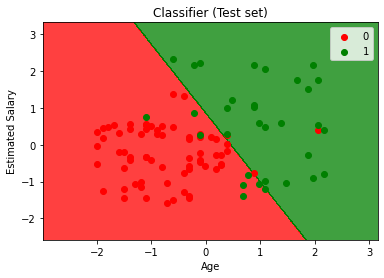

In [ ]:

X_set, y_set = xtest, ytest 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
							stop = X_set[:, 0].max() + 1, step = 0.01), 
					np.arange(start = X_set[:, 1].min() - 1, 
							stop = X_set[:, 1].max() + 1, step = 0.01)) 

plt.contourf(X1, X2, classifier.predict( 
			np.array([X1.ravel(), X2.ravel()]).T).reshape( 
			X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green'))) 

plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 

for i, j in enumerate(np.unique(y_set)): 
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
				c = ListedColormap(('red', 'green'))(i), label = j) 
	
plt.title('Classifier (Test set)') 
plt.xlabel('Age') 
plt.ylabel('Estimated Salary') 
plt.legend() 
plt.show() 
